**tensorflow ML basics with Keras**
###Basic Image Classification
#####Classify images of clothing

In [ ]:
import tensorflow as tf

import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.7.0


In [ ]:
#Tensorflow에서 Fashion MNIST data 가져오고 load하기
fashion_mnist = tf.keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

In [ ]:
#각 imagesms gkskdml label에 mapping되어 있음
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat', 'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

In [ ]:
#데이터 학인
train_images.shape

(60000, 28, 28)

In [ ]:
len(train_labels)

60000

In [ ]:
train_labels

array([9, 0, 0, ..., 3, 0, 5], dtype=uint8)

In [ ]:
test_images.shape

(10000, 28, 28)

In [ ]:
len(test_labels)

10000

In [ ]:
test_labels

array([9, 2, 1, ..., 8, 1, 5], dtype=uint8)

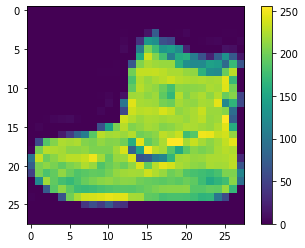

In [ ]:
#Data preprocessing
plt.figure() #새로운 figure 생성
plt.imshow(train_images[0]) #이미지 출력
plt.colorbar() #colorbar 추가
plt.grid(False) #grid 없앰. default도 False인듯
plt.show()

In [ ]:
#0~255값 범위를 0~1값 범위로 전처리
train_images = train_images / 255.0
test_images = test_images / 255.0

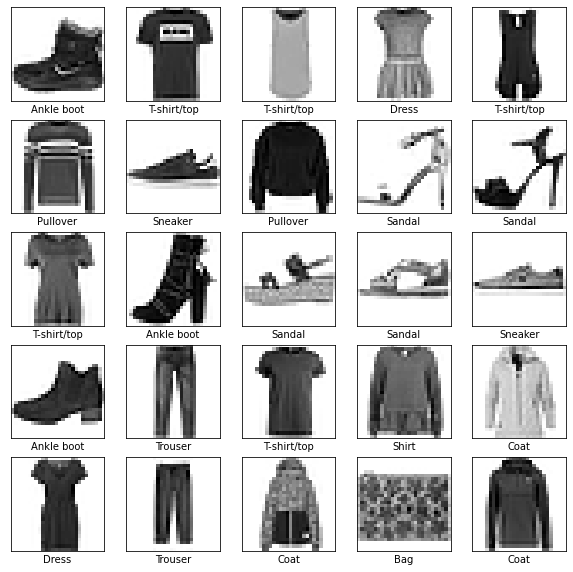

In [ ]:
#25개의 image만 출력해보기
plt.figure(figsize=(10,10)) #10x10의 크기
for i in range(25): #25개의 image
  plt.subplot(5,5,i+1) #5x5에서 각각 i+1번째에 위치
  plt.xticks([]) #xticks; x축의 눈금을 삭제
  plt.yticks([]) #yticks 삭제
  plt.grid(False)
  plt.imshow(train_images[i], cmap=plt.cm.binary) #회색조
  plt.xlabel(class_names[train_labels[i]]) #사전에 지정한 이름 붙여주기
plt.show()

In [ ]:
#model의 layer를 구성한다
#model을 compile한다
#신경망 model을 완성한다
model = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28, 28)), #28x28의 2차원 배열을 28x28=784의 1차원 배열로 변환
  tf.keras.layers.Dense(128, activation='relu'), #128개의 node
  tf.keras.layers.Dense(10) #10개 node의 softmax layer, 10개의 probability를 반환, 이 10개의 sum은 1
])

In [ ]:
#optimizer(옵티마이저), loss funcion(손실 함수), metrics(메트릭) 설정
model.compile(optimizer='adam',
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=['accuracy'])

In [ ]:
#model training
#1. training datafmf model에 주입(train_images, train_labels)
#2. image와 label을 mapping하는 방법을 model이 배움
#3. test_images를 통해 새로운 예측 생성
#4. test_images의 예측과 test_labels가 일치하는지 확인
model.fit(train_images, train_labels, epochs=10) #10번의 epochs(에포크)동안 훈련

Epoch 1/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.4999 - accuracy: 0.8240
Epoch 2/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3775 - accuracy: 0.8635
Epoch 3/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3387 - accuracy: 0.8762
Epoch 4/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.3135 - accuracy: 0.8856
Epoch 5/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2969 - accuracy: 0.8908
Epoch 6/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2824 - accuracy: 0.8953
Epoch 7/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.2696 - accuracy: 0.9003
Epoch 8/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2590 - accuracy: 0.9052
Epoch 9/10
1875/1875 [==============================] - 5s 3ms/step - loss: 0.2498 - accuracy: 0.9072
Epoch 10/10
1875/1875 [==============================] - 5s 2ms/step - loss: 0.240

In [ ]:
#accuracy evaluation
test_loss, test_acc = model.evaluate(test_images, test_labels, verbose=2) #0 = silent, 1 = progress bar, 2 = one line per epoch.

print('\nTest accuracy: ', test_acc)

313/313 - 1s - loss: 0.3348 - accuracy: 0.8820 - 509ms/epoch - 2ms/step

Test accuracy:  0.8820000290870667


In [ ]:
#prediction
probability_model = tf.keras.Sequential([model, tf.keras.layers.Softmax()])

In [ ]:
predictions = probability_model.predict(test_images)

In [ ]:
predictions[0]

array([6.4988598e-07, 1.0901626e-08, 8.9119494e-09, 7.5369329e-09,
       9.6187067e-09, 2.0274455e-03, 1.8175194e-06, 4.5090936e-02,
       6.7857636e-06, 9.5287228e-01], dtype=float32)

In [ ]:
np.argmax(predictions[0]) #가장 큰 index값 반환

9

In [ ]:
#예측이 맞는지 확인
test_labels[0]

9

In [ ]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i] #변수 초기화
  
  plt.grid(False) #grid 삭제
  plt.xticks([]) #xticks 삭제
  plt.yticks([]) #yticks 삭제

  plt.imshow(img, cmap=plt.cm.binary) #회색조

  predicted_label = np.argmax(predictions_array) #predictions_array(인덱스별로 예측 확률 저장된 리스트)에서 가장 확률이 높은 값의 index를 predicted_label에 저장
  if predicted_label == true_label: #예측 성공
    color = 'blue'
  else: #예측 실패
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label], #예측 이름
                                       100*np.max(predictions_array), #예측된 확률
                                       class_names[true_label]), #실제 이름
                                      color = color) #성공, 실패 색깔로 나타냄
  
def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i] #변수 초기화

  plt.grid(False) #grid 삭제
  plt.xticks(range(10)) #xticks 0~9
  plt.yticks([]) #yicks 삭제

  thisplot = plt.bar(range(10), predictions_array, color="#777777") #회색조
  plt.ylim([0,1]) #y축의 범위: 0~1
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red') #예측을 red
  thisplot[true_label].set_color('blue') #실제를 blue

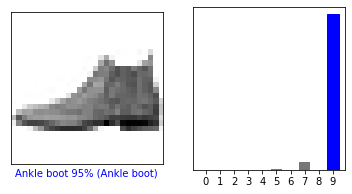

In [ ]:
#0번째 원소 예측 확인 (성공한 예)
i = 0
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

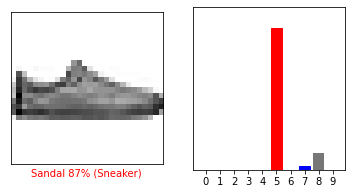

In [ ]:
#13번째 원소 예측 확인 (실패한 예) 스니커즈를 샌달이라고 착각
i= 12
plt.figure(figsize=(6,3))

plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)

plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)

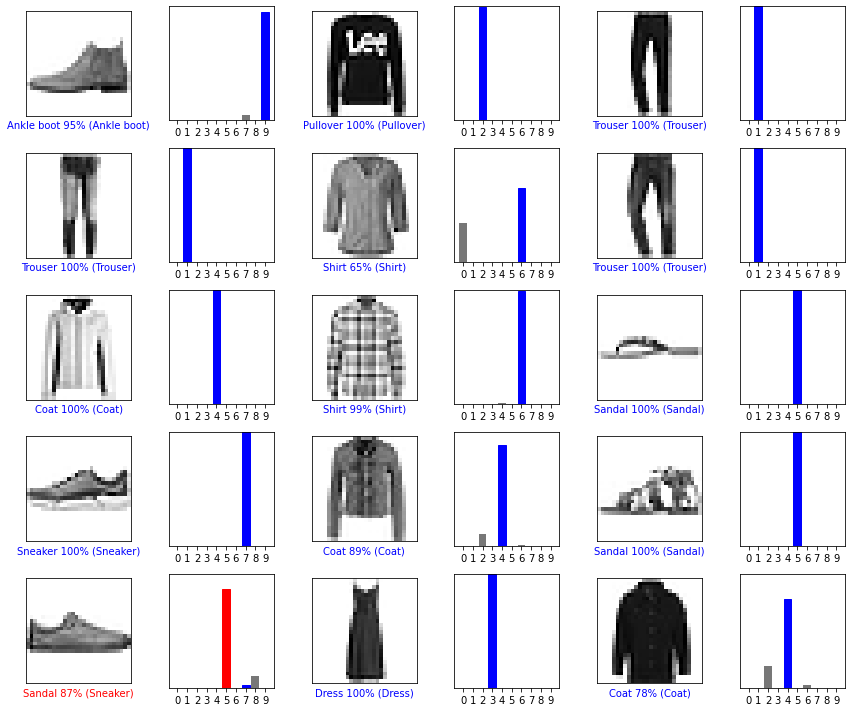

In [ ]:
#여러개 예측 확인
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols

plt.figure(figsize=(2*2*num_cols, 2*num_rows))

for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1) #2개의 결과 표현해야하니 col값을 2배로 해주기
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout() #subplot들이 겹치지 않도록 여백
plt.show()

In [ ]:
#훈련된 이미지에 대해 예측
img = test_images[1]

print(img.shape)

(28, 28)


In [ ]:
img = (np.expand_dims(img, 0)) #차원 추가

print(img.shape)

(1, 28, 28)


In [ ]:
predictions_single = probability_model.predict(img)

print(predictions_single)

[[5.6927554e-05 1.3226258e-12 9.9768353e-01 1.9766906e-10 2.2320391e-03
  3.4051428e-11 2.7496726e-05 1.1365545e-17 1.1221556e-08 9.0513581e-16]]


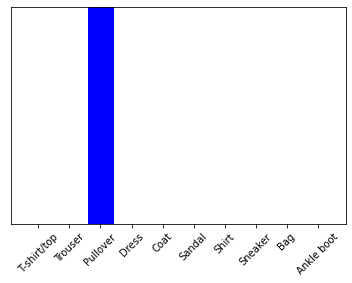

In [ ]:
plot_value_array(1, predictions_single[0], test_labels)
_ = plt.xticks(range(10), class_names, rotation=45)
plt.show()

In [ ]:
np.argmax(predictions_single[0])

2